Aim- Using K-means to find clusters within iris dataset by using unsupervised learning.

In [2]:
# Step 1: Importing all necessary liberaries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


Initialization 


In [3]:
# Step2:Loading the raw data from the iris datasets of SK learn

iris=datasets.load_iris()
print(iris.feature_names)

#Note: Also printing the features for our better understanding


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
#Step 2(b) : Creating our dataframe 

df = pd.DataFrame({
    'x': iris.data[:,0],
    'y': iris.data[:,1],
    'cluster' : iris.target
})
df.head()

,x,y,cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [5]:
# Step 2(c): Finding the centeroids by means of x,y of 3 different clusters(0,1,2 or  Setosa, Versicolor, Virignica)

centeroids={}
for i in range(3):
    result_list=[]
    result_list.append(df.loc[df['cluster']==i]['x'].mean())
    result_list.append(df.loc[df['cluster']==i]['y'].mean())

    centeroids[i]=result_list

centeroids

#"Here we get the centeroids of all three clusters"

{0: [5.006, 3.428],
 1: [5.936, 2.7700000000000005],
 2: [6.587999999999998, 2.974]}

Text(0, 0.5, 'Sepal Width(cm)')

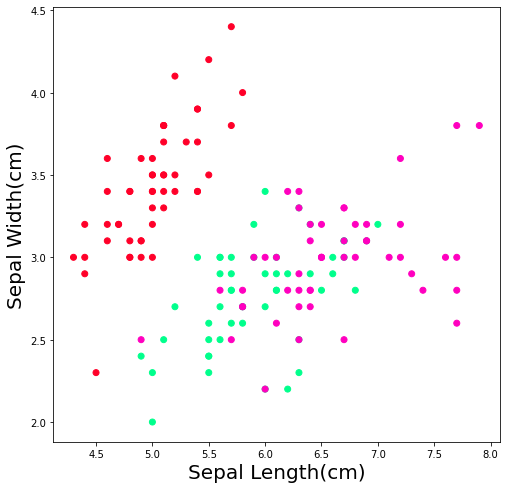

In [6]:
#Step 3: Now plotting the data that we have obtained from the dataframe and the the previous cell
#here c=color of all three clusters, gist rainbow is used for rainbow colors

fig=plt.figure(figsize=(8,8))
plt.scatter(df['x'],df['y'],c=iris.target,cmap='gist_rainbow')
plt.xlabel("Sepal Length(cm)",fontsize=20)
plt.ylabel("Sepal Width(cm)",fontsize=20)

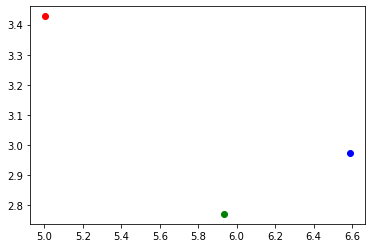

In [7]:
# Step 3(b): Now we will define a fixed color for all the respective centeroids, plotting the centeroids as well.
colmap={0:'r',1:'g',2:'b'}
for i in centeroids.keys():     #for i in range(3) will also work the same way
    plt.scatter(centeroids[i][0],centeroids[i][1],color=colmap[i])

plt.show()    



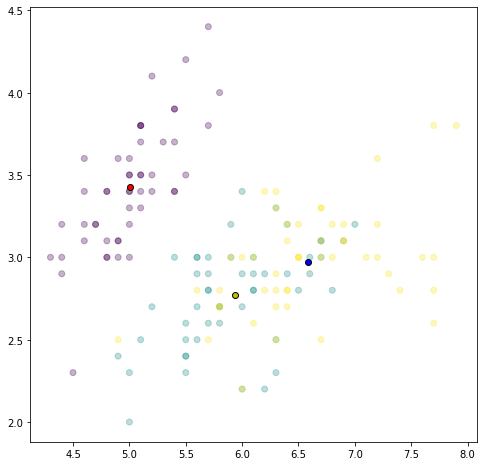

In [8]:
#Step 3(c) : Plotting the final graph which is a summation of all the points or the cluster with their respective centeroids

#here alpha is used to adjust the transperency of the clusters
fig=plt.figure(figsize=(8,8))
plt.scatter(df['x'],df['y'],c=iris.target,alpha=0.3)
colmap={0:'r',1:'y',2:'b'}
col=[0,1]
for i in centeroids.keys():
    plt.scatter(centeroids[i][0],centeroids[i][1],color=colmap[i],edgecolors='k')

plt.show()

The internship task that was needed ended above, after this we will make our data more accuracte, update the data frame and will form a new plot


Assignment Stage:

Assignment Function: Calculating distance and updating dataframe

In [9]:
def assignment(df,centeroids):
    for i in centeroids.keys():
        #sqrt((x2-x2)^2+(y2-y1)^2)
        df['distance_from_{}'.format(i)]=(np.sqrt(
                       (df['x']-centeroids[i][0])**2 + (df['y']-centeroids[i][1])**2) )

    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centeroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [10]:
# Step4(b): Here we are updating our dataframe with the above described function

df=assignment(df,centeroids)
df

,x,y,cluster,distance_from_0,distance_from_1,distance_from_2,closest,color
0,5.1,3.5,0,0.118406,1.109863,1.578233,0,r
1,4.9,3.0,0,0.440931,1.061224,1.688200,0,r
2,4.7,3.2,0,0.381602,1.308662,1.901478,0,r
3,4.6,3.1,0,0.521939,1.376153,1.991989,0,r
4,5.0,3.6,0,0.172105,1.250998,1.706933,0,r
...,...,...,...,...,...,...,...,...
145,6.7,3.0,2,1.747232,0.797870,0.114978,2,b
146,6.3,2.5,2,1.592363,0.453206,0.554635,1,y
147,6.5,3.0,2,1.554098,0.609094,0.091761,2,b
148,6.2,3.4,2,1.194328,0.683078,0.576212,2,b


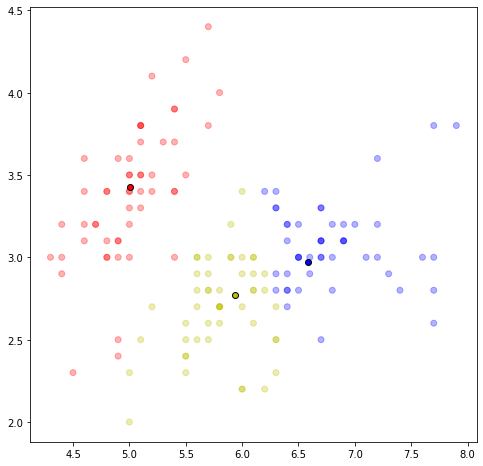

In [11]:
fig=plt.figure(figsize=(8,8))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.3)
for i in centeroids.keys():
    plt.scatter(centeroids[i][0],centeroids[i][1],color=colmap[i],edgecolors='k')


plt.show()

Stage 3: Update Stage begins from here


In [12]:
def update(k):
    for i in centeroids.keys():
        centeroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centeroids[i][1]=np.mean(df[df['closest']==i]['y'])
    return k    

In [13]:
#Updating the centroid location with the new data we have achived using the update function above

centeroids=update(centeroids)
centeroids

{0: [5.009433962264151, 3.3830188679245285],
 1: [5.806122448979591, 2.693877551020408],
 2: [6.802083333333333, 3.06875]}

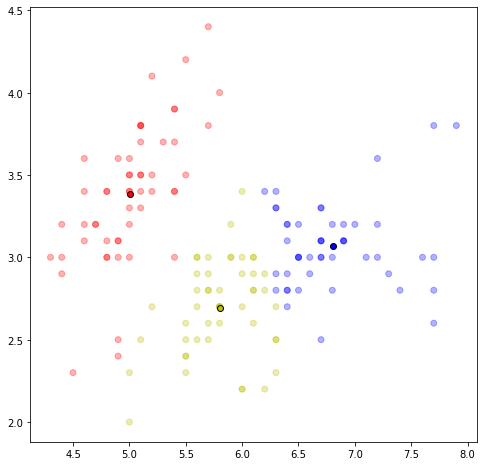

In [14]:
fig=plt.figure(figsize=(8,8))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.3)
for i in centeroids.keys():
    plt.scatter(centeroids[i][0],centeroids[i][1],color=colmap[i],edgecolors='k')
plt.show()    


Repeating assignment stage to re-assigning the points with clusters


In [15]:
df=assignment(df,centeroids)


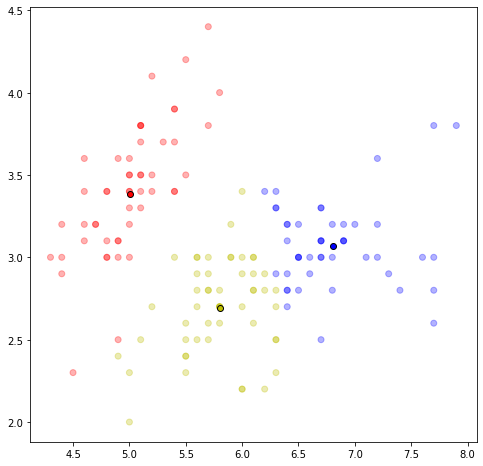

In [16]:
fig=plt.figure(figsize=(8,8))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.3)
for i in centeroids.keys():
    plt.scatter(centeroids[i][0],centeroids[i][1],color=colmap[i],edgecolors='k')
plt.show()    


Continuing the assignment stage until all assigneed clusters doesn't change anymore.

In [17]:
while True:
    closest_centeroids=df['closest'].copy(deep=True)
    centeroids=update(centeroids)
    df=assignment(df,centeroids)
    if closest_centeroids.equals(df['closest']):
        break

Printing our finals results as the centeroids and points aren't changing anymore.

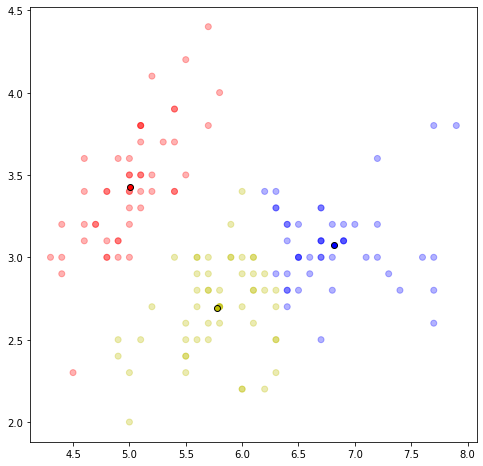

In [18]:
fig=plt.figure(figsize=(8,8))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.3)
for i in centeroids.keys():
    plt.scatter(centeroids[i][0],centeroids[i][1],color=colmap[i],edgecolors='k')
plt.show()    